In [1]:
from z3 import *
import numpy as np
import random
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True # to for tight_layout()

import os, sys
sys.path.append(os.path.join("../../../../"))

# our library
from src.mcmc_sat import mcmc, utils, models

In [2]:
# experiment setup
bound = 42
reduction_factor = 4
num_bits = 8
max_int_bv = 2**6-1

In [3]:
(g, num_bits, num_vars) = models.get_books_sat(bound=bound, y_reduction_factor=reduction_factor, num_bits=num_bits, max_int_bv=max_int_bv)

In [4]:
trace = mcmc.sample_mh_trace_from_z3_model(backend='spur',
                                           z3_problem=g,
                                           num_vars=num_vars,
                                           num_bits=num_bits,
                                           num_samples=10000, 
                                           num_chains=4)

Using default filename: "spur_input/samples_z3_problem.txt"
Performing Uniform Model Sampling...
Input File:  spur_input/z3_problem.cnf
Output File: spur_input/samples_z3_problem.txt

Preprocessing ... DONE
variables (all/used/free): 	7735/7735/0
independent support size:  	0
clauses (all/long/binary/unit): 35781/28312/7163/306
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	929 MB

STAGE #1: Build the initial partial assignments
STAGE #1: COMPLETED building initial partial assignments
STAGE #2 - Filling in partial assignments...
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16

 Free RAM 727MB
Maximum cache size:	929 MB

Sample #1 of 880 is already a complete assignment.  Continuing...
Completing sample #2 of 880 which has 562 variables unset and 3 samples.
Completing sample #3 of 880 which has 487 variables unset and 1 sample.
Completing sample #4 of 880 which has 326 variables unset and 1 sample.
Completing sample #5 o

/home/pardo/programs/miniconda3/envs/mcmc_sat/lib/python3.12/site-packages/arviz/plots/traceplot.py:222: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (72), generating only 20 plots
  warnings.warn(


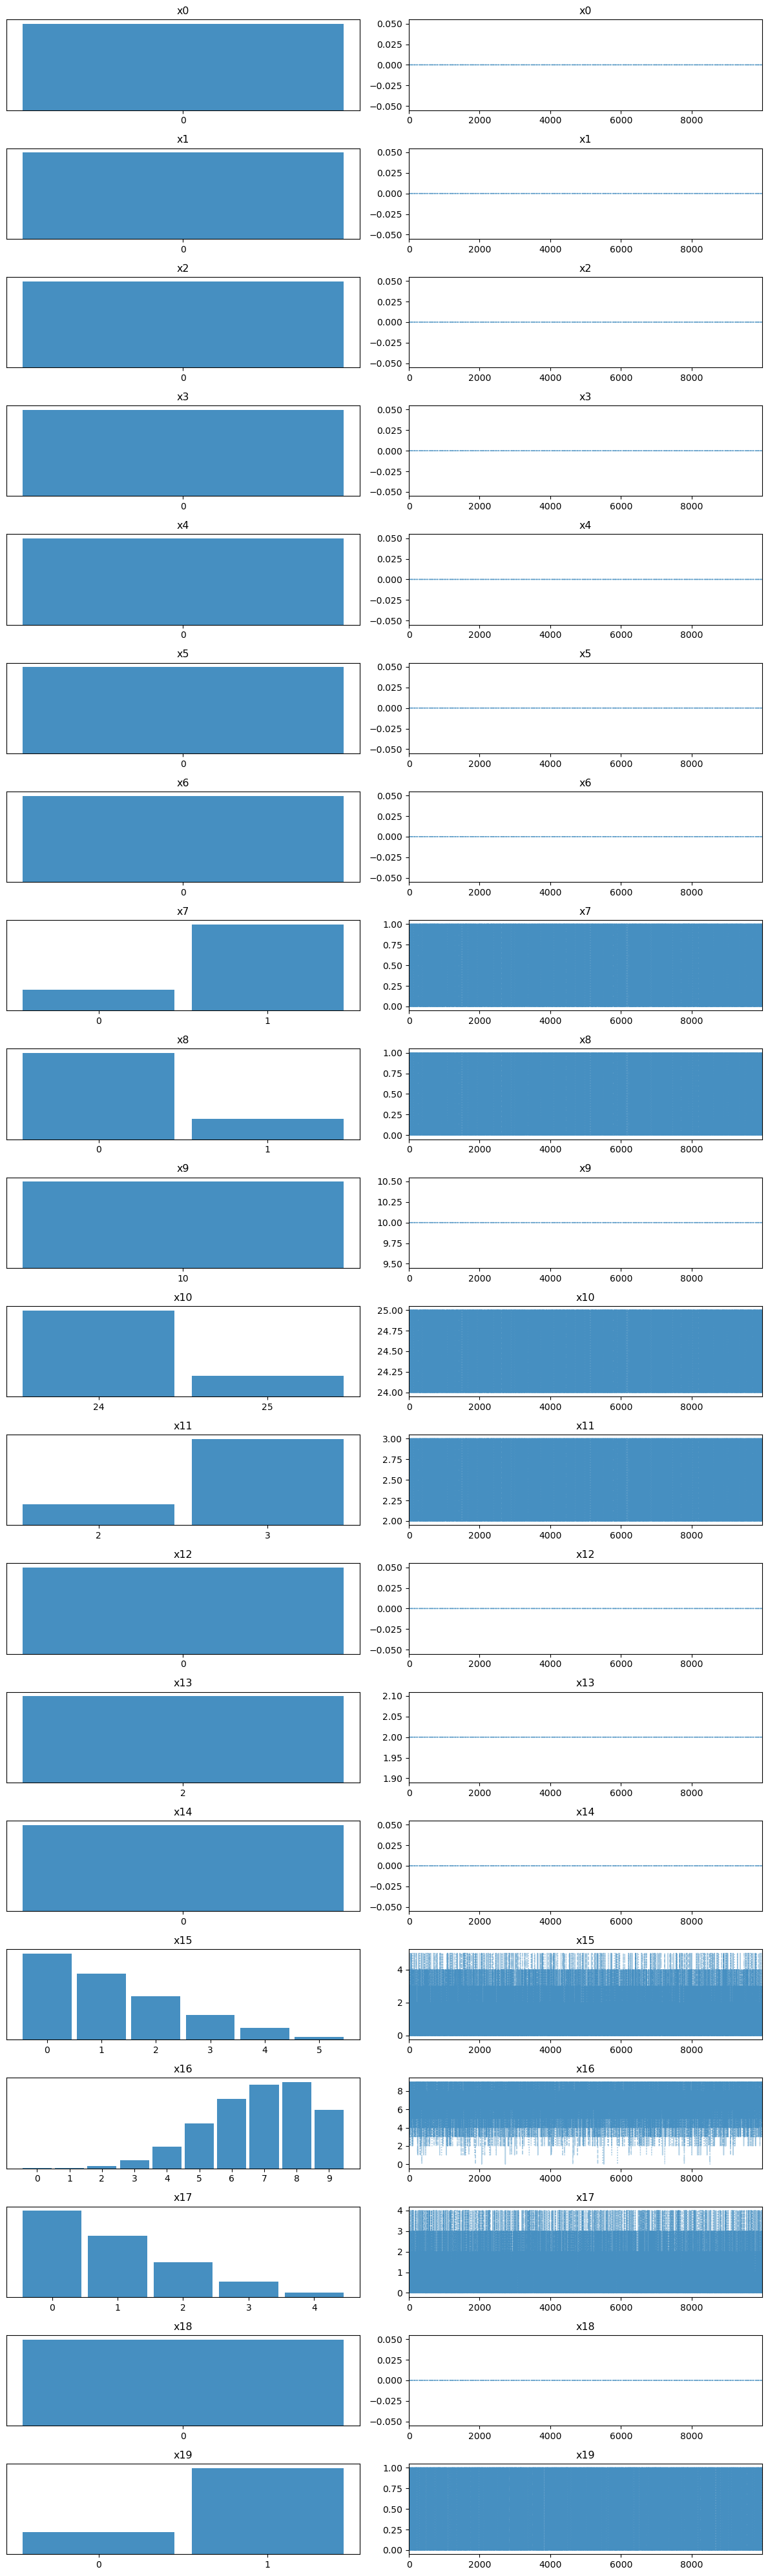

In [5]:
# Plot the posterior
az.plot_trace(trace);
plt.savefig('spur_trace_plot.png', dpi=150);

In [6]:
# Diagnosis
az.summary(trace)

/home/pardo/programs/miniconda3/envs/mcmc_sat/lib/python3.12/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc_sat/lib/python3.12/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc_sat/lib/python3.12/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc_sat/lib/python3.12/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_sampl

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x0,0.000,0.000,0.0,0.0,0.000,0.000,40000.0,40000.0,NaN
x1,0.000,0.000,0.0,0.0,0.000,0.000,40000.0,40000.0,NaN
x2,0.000,0.000,0.0,0.0,0.000,0.000,40000.0,40000.0,NaN
x3,0.000,0.000,0.0,0.0,0.000,0.000,40000.0,40000.0,NaN
x4,0.000,0.000,0.0,0.0,0.000,0.000,40000.0,40000.0,NaN
...,...,...,...,...,...,...,...,...,...
x67,0.802,0.398,0.0,1.0,0.002,0.001,40040.0,40000.0,1.0
x68,0.198,0.398,0.0,1.0,0.002,0.001,40040.0,40000.0,1.0
x69,4.811,1.216,3.0,6.0,0.006,0.004,40416.0,40000.0,1.0
x70,24.337,1.587,22.0,27.0,0.008,0.006,40065.0,39619.0,1.0


In [7]:
utils.save_trace(trace, f'roads_spur_case_{bound}_rf_{reduction_factor}_bits_{num_bits}_max_int_{max_int_bv}.nc')